# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

In [ ]:
# write your code from here


Number of anomalies detected: 11


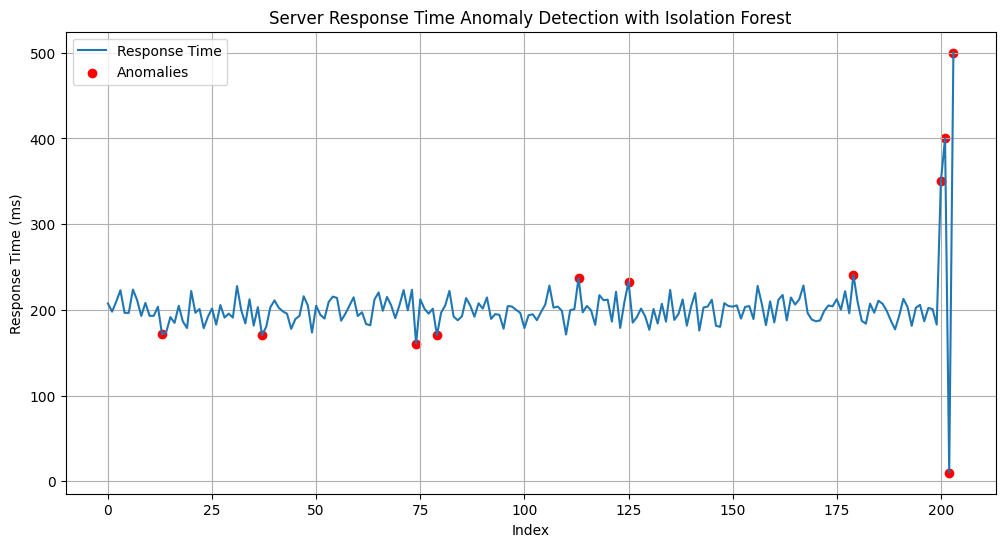

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate Dataset (Replace with real data if needed)
np.random.seed(42)
response_times = np.random.normal(loc=200, scale=15, size=200)  # Normal response times
response_times = np.append(response_times, [350, 400, 10, 500])  # Add anomalies

df = pd.DataFrame({'ResponseTime': response_times})

# Step 2: Train Isolation Forest model
try:
    # Validation checks
    assert 'ResponseTime' in df.columns, "Column 'ResponseTime' missing"
    assert np.issubdtype(df['ResponseTime'].dtype, np.number), "'ResponseTime' must be numeric"
    assert df['ResponseTime'].notna().all(), "'ResponseTime' contains NaN values"
    assert len(df) > 0, "Empty dataset"

    model = IsolationForest(contamination=0.05, random_state=42)
    df['Anomaly'] = model.fit_predict(df[['ResponseTime']])

    # Step 3: Predict anomalies (-1 indicates anomaly)
    df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # 1 for anomaly

    # Step 4: Evaluate and visualize results
    num_anomalies = df['Anomaly'].sum()
    print(f"Number of anomalies detected: {num_anomalies}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(df['ResponseTime'], label='Response Time')
    plt.scatter(df.index[df['Anomaly'] == 1], df[df['Anomaly'] == 1]['ResponseTime'], color='red', label='Anomalies')
    plt.xlabel('Index')
    plt.ylabel('Response Time (ms)')
    plt.title('Server Response Time Anomaly Detection with Isolation Forest')
    plt.legend()
    plt.grid(True)
    plt.show()

except AssertionError as e:
    print("Data Validation Error:", e)
except Exception as e:
    print("Unexpected Error:", e)
